In [ ]:
#Librerias
from matplotlib.image import imread
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import CubicHermiteSpline


(-0.5, 853.5, 509.5, -0.5)

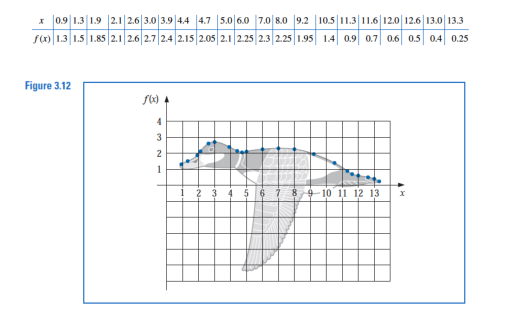

In [ ]:
#Leer imagen:
paloma= imread("Paloma.png")

#Mostrar Imagen:
plt.imshow(paloma)
plt.axis(False)

In [ ]:
#Definiendo lista de puntos de la figura:

x = np.array([0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3])
y = np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25])

#Creando un panda con los datos dados:

dicc = {"x":x, "y":y}
df = pd.DataFrame(dicc)
df.head


<bound method NDFrame.head of        x     y
0    0.9  1.30
1    1.3  1.50
2    1.9  1.85
3    2.1  2.10
4    2.6  2.60
5    3.0  2.70
6    3.9  2.40
7    4.4  2.15
8    4.7  2.05
9    5.0  2.10
10   6.0  2.25
11   7.0  2.30
12   8.0  2.25
13   9.2  1.95
14  10.5  1.40
15  11.3  0.90
16  11.6  0.70
17  12.0  0.60
18  12.6  0.50
19  13.0  0.40
20  13.3  0.25>

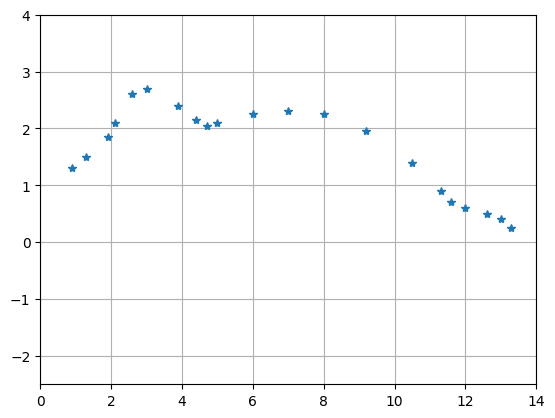

In [ ]:
#Grafica de puntos dados a interpolar:

plt.plot(x,y, "*")
plt.xlim(0,14)
plt.ylim(-2.5,4)
plt.grid()
plt.show()

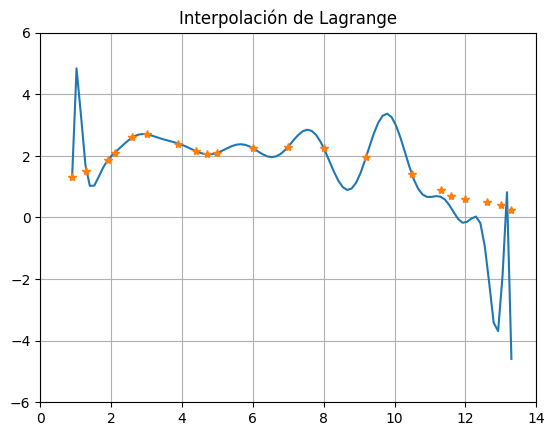

In [ ]:
# Polinomio de Lagrange para interpolación:

p_x = lagrange(x,y)

# Gráfica del polinomio Lagrange:

w = np.linspace(x[0], x[-1], 100)
plt.plot(w,p_x(w))
plt.plot(x,y, "*")
plt.xlim(0,14)
plt.ylim(-6,6)
plt.grid()
plt.title("Interpolación de Lagrange")
plt.show()

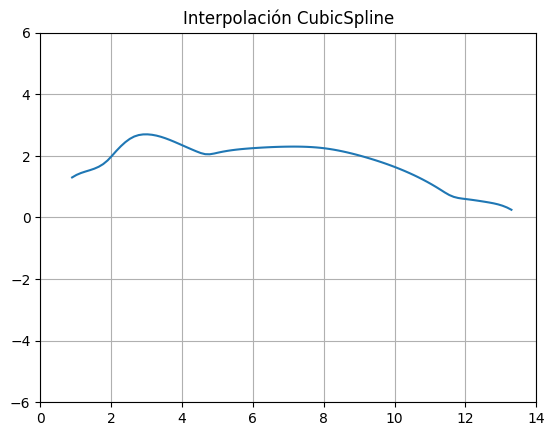

In [ ]:
# Interpolación Cubic Spline para valores (x,y)

cs = CubicSpline(x,y)

#Creamos valores en x entre los puntos dados:

X = np.linspace(x[0],x[-1], 100)

#Evaluamos los Valores de X dentro del polinomio:

Y = cs(X)

#Graficamos:

plt.plot(X,Y)
plt.xlim(0,14)
plt.ylim(-6,6)
plt.grid()
plt.title("Interpolación CubicSpline")
plt.show()


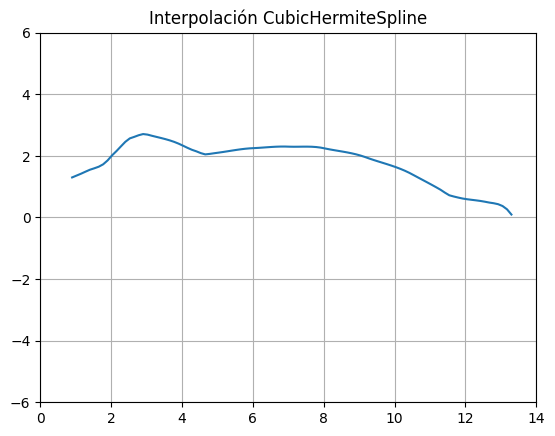

In [ ]:
# Metodo CubicHermiteSpline:

#Hallamos la derivada entre los puntos dados:

dydx = np.diff(y)/np.diff(x)

# Calculamos la funcion CubicHermiteSpline

chs = CubicHermiteSpline(x[:-1], y[:-1], dydx)

#Evaluamos la función para valores de X.

Ychs = chs(X)

#Graficos:

plt.plot(X,Ychs)
plt.xlim(0,14)
plt.ylim(-6,6)
plt.grid()
plt.title("Interpolación CubicHermiteSpline")
plt.show()

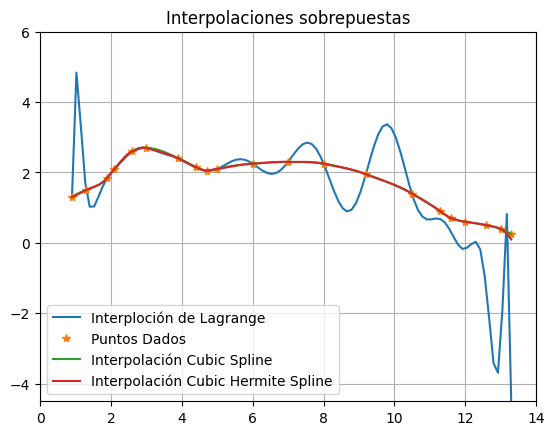

In [ ]:
#Grafico con diferentes métodos de interpolación superpuestos:

plt.plot(w,p_x(w), label="Interploción de Lagrange")
plt.plot(x,y, "*", label="Puntos Dados")
plt.plot(X,Y, label= "Interpolación Cubic Spline")
plt.plot(X,Ychs, label = "Interpolación Cubic Hermite Spline" )
plt.xlim(0,14)
plt.ylim(-4.5,6)
plt.grid()
plt.title("Interpolaciones sobrepuestas")
plt.legend()
plt.show()